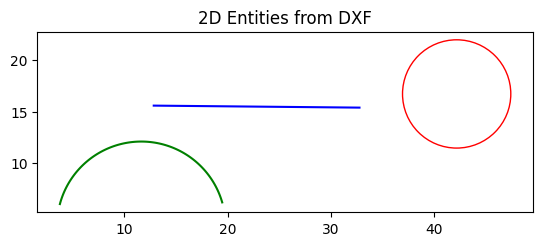

In [2]:
import ezdxf
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the DXF document
doc = ezdxf.readfile("Drawing1.dxf")

# 2. Access the modelspace
mspace = doc.modelspace()

# 3. Set up a plotting environment
fig, ax = plt.subplots()

# 4. Iterate through the entities in modelspace and plot them
for entity in mspace:
    if entity.dxftype() == 'LINE':
        # Extract start and end points
        start_point = entity.dxf.start
        end_point = entity.dxf.end

        # Plot the line segment
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], 'b-')

    elif entity.dxftype() == 'CIRCLE':
        # Extract center and radius
        center = entity.dxf.center
        radius = entity.dxf.radius

        # Create a circle and plot
        circle = plt.Circle((center.x, center.y), radius, color='r', fill=False)
        ax.add_patch(circle)

    elif entity.dxftype() == 'ARC':
        # Extract center, radius, and start/end angles
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle

        # Create arc points and plot
        theta = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
        x = center.x + radius * np.cos(theta)
        y = center.y + radius * np.sin(theta)

        ax.plot(x, y, 'g-')

# 5. Display the plot
ax.set_aspect('equal', 'box')
ax.set_title("2D Entities from DXF")
plt.show()


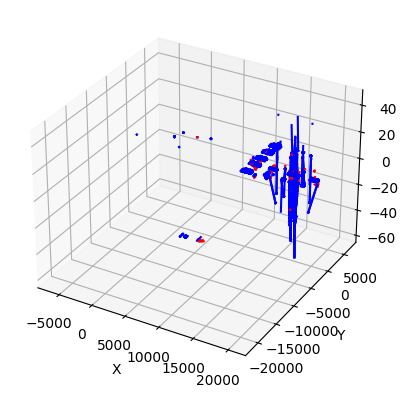